In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = '/content/drive/MyDrive/10708-PGM/project'
# https://pytorch-lightning-bolts.readthedocs.io/en/latest/autoencoders.html#basic-vae

In [ ]:
!pip install lightning-bolts

In [ ]:
from pl_bolts.datamodules import CIFAR10DataModule, STL10DataModule
from pl_bolts.models.autoencoders import VAE
from pytorch_lightning import Trainer
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms

In [ ]:
vae = VAE(input_height=32, first_conv=False)
print(VAE.pretrained_weights_available())

vae = vae.from_pretrained(f'cifar10-resnet18')

vae.freeze()

['cifar10-resnet18', 'stl10-resnet18']


In [ ]:
dm = CIFAR10DataModule(PATH, normalize=True)
dm.prepare_data()
dm.setup("fit")
dataloader = dm.train_dataloader()

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:89: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7."
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/datamodule.py:108: LightningDeprecationWarning: DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
  "DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7."


In [ ]:
mean = torch.tensor(dm.default_transforms().transforms[1].mean)
std = torch.tensor(dm.default_transforms().transforms[1].std)
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def get_unnormalized_image(X):
    return np.transpose(unnormalize(X).detach().numpy(), (1, 2, 0))

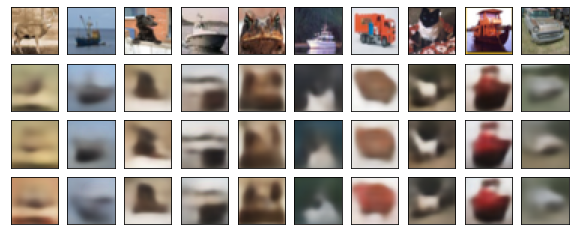

In [ ]:
# X, _ = next(iter(dataloader))
vae.eval()
X_hat = vae(X)
X_hat2 = vae(X)
X_hat3 = vae(X)

fig, axes = plt.subplots(4, 10, figsize=(10, 4))
for i in range(10):  
  ax_real = axes[0][i]
  ax_real.imshow(get_unnormalized_image(X[i]))
  ax_real.get_xaxis().set_visible(False)
  ax_real.get_yaxis().set_visible(False)

  ax_gen = axes[1][i]
  ax_gen.imshow(get_unnormalized_image(X_hat[i]))
  ax_gen.get_xaxis().set_visible(False)
  ax_gen.get_yaxis().set_visible(False)

  ax_gen = axes[2][i]
  ax_gen.imshow(get_unnormalized_image(X_hat2[i]))
  ax_gen.get_xaxis().set_visible(False)
  ax_gen.get_yaxis().set_visible(False)

  ax_gen = axes[3][i]
  ax_gen.imshow(get_unnormalized_image(X_hat3[i]))
  ax_gen.get_xaxis().set_visible(False)
  ax_gen.get_yaxis().set_visible(False)

In [ ]:
PATH = '/content/drive/MyDrive/10708-PGM/project'

from pl_bolts.datamodules import CIFAR10DataModule, STL10DataModule
from pl_bolts.models.autoencoders import VAE
from pytorch_lightning import Trainer
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms


vae = VAE(input_height=32, first_conv=False)
print(VAE.pretrained_weights_available())

vae = vae.from_pretrained(f'cifar10-resnet18')

vae.freeze()


dm = CIFAR10DataModule(PATH, normalize=True)
dm.prepare_data()
dm.setup("fit")
dataloader = dm.train_dataloader()


mean = torch.tensor(dm.default_transforms().transforms[1].mean)
std = torch.tensor(dm.default_transforms().transforms[1].std)
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def get_new_images(X):
    vae.eval()
    X_hat = vae(X)
    return unnormalize(X_hat).detach()
